In [1]:
%matplotlib notebook
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import tree
from sklearn import preprocessing
import csv
import graphviz

In [2]:
filename = 'Electronics.csv'
fp = open(filename, 'r') 
reader = csv.reader(fp)
header = reader.__next__()

labelList = []
featureList = []

for row in reader:
    row_dict = {}
    labelList.append(row[-1])
    for i in range(1, len(row) - 1):
        row_dict[header[i]] = row[i]
    featureList.append(row_dict)

print(featureList)
print(labelList)

[{'age': 'youth', 'income': 'high', 'student': 'no', 'credit_rating': 'fair'}, {'age': 'youth', 'income': 'high', 'student': 'no', 'credit_rating': 'excellent'}, {'age': 'middle_aged', 'income': 'high', 'student': 'no', 'credit_rating': 'fair'}, {'age': 'senior', 'income': 'medium', 'student': 'no', 'credit_rating': 'fair'}, {'age': 'senior', 'income': 'low', 'student': 'yes', 'credit_rating': 'fair'}, {'age': 'senior', 'income': 'low', 'student': 'yes', 'credit_rating': 'excellent'}, {'age': 'middle_aged', 'income': 'low', 'student': 'yes', 'credit_rating': 'excellent'}, {'age': 'youth', 'income': 'medium', 'student': 'no', 'credit_rating': 'fair'}, {'age': 'youth', 'income': 'low', 'student': 'yes', 'credit_rating': 'fair'}, {'age': 'senior', 'income': 'medium', 'student': 'yes', 'credit_rating': 'fair'}, {'age': 'youth', 'income': 'medium', 'student': 'yes', 'credit_rating': 'excellent'}, {'age': 'middle_aged', 'income': 'medium', 'student': 'no', 'credit_rating': 'excellent'}, {'ag

In [3]:
# transform the feature into vectors
vec = DictVectorizer()
x_data = vec.fit_transform(featureList).toarray()

# transform the label into 0 and 1 label
lb = preprocessing.LabelBinarizer()
y_data = lb.fit_transform(labelList)

In [4]:
# create the decision tree model
model = tree.DecisionTreeClassifier()
model.fit(x_data, y_data)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [5]:
# exporting the decision tree
dot_data = tree.export_graphviz(model,
                                out_file = None,
                               feature_names = vec.get_feature_names(),
                               class_names=lb.classes_,
                               filled=True,
                               rounded=True,
                               special_characters=True)

graph = graphviz.Source(dot_data)
# graph.render('Computer')

'Computer.pdf'

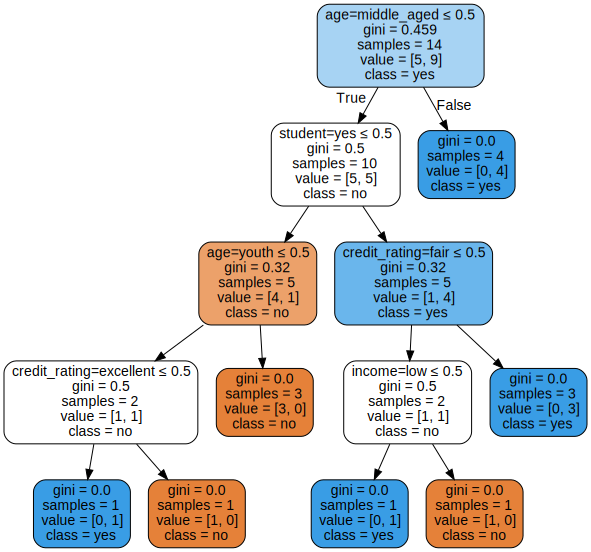

In [6]:
graph